# Mall Customer Segmentation

#1.Problem

# 1.1 Problem Statement

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

# 1.2 About Dataset


You are owing a supermarket mall and through membership cards , you have some basic data about your customers like Customer ID, age, gender, annual income and spending score. Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

This file Mall_Customers.csv contains the basic information (ID, age, gender, income, spending score) about 200 customers

# 2.Data Exploration

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings(action="ignore")

In [36]:
df = pd.read_csv("Mall_Customers.csv")

In [37]:
df.shape

(200, 5)

In [38]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
103,104,Male,26,62,55
187,188,Male,28,101,68
140,141,Female,57,75,5
123,124,Male,39,69,91


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 5 columns:

+ Customer ID - numerical - unique customer number - integer
+ Gender - categorical - binary (Male/Female)
+ Age - numerical - integer
+ Annual Income (k$) - numerical - integer
+ Spending Score (1-100) - numerical - integer

In [40]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


# 3.EDA

In [41]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [42]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


In [43]:
df["Gender"].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


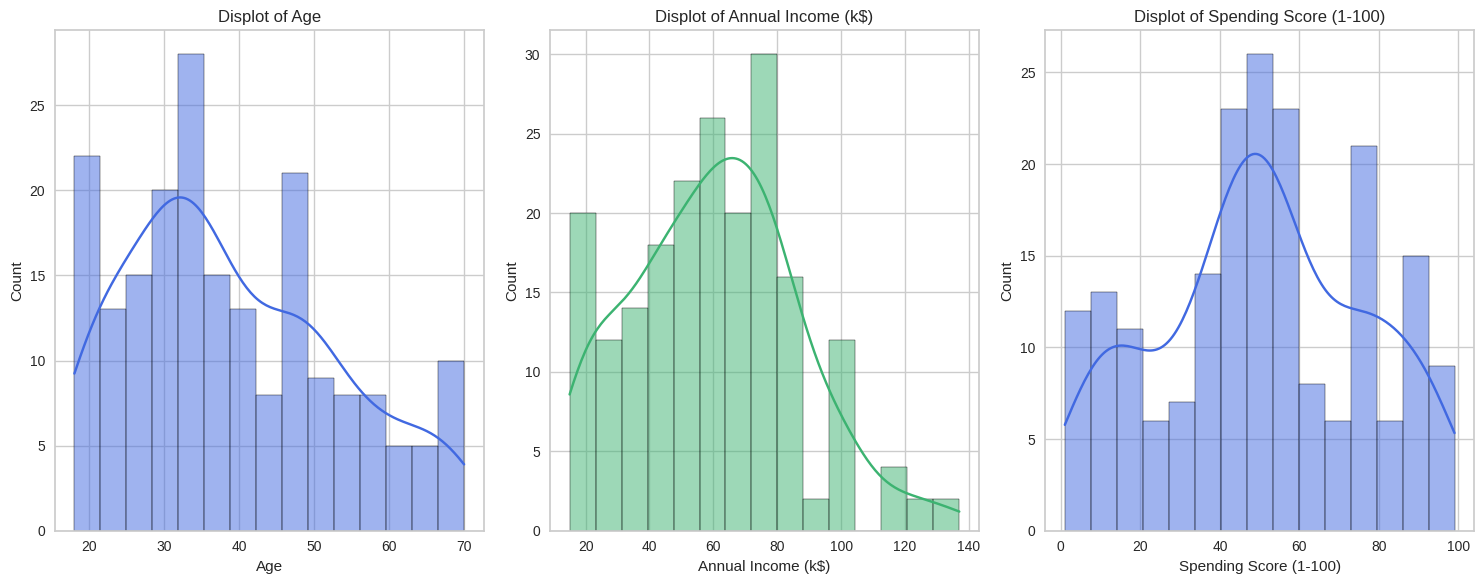

In [44]:
fig,ax = plt.subplots(1,3, figsize = (15,6))
color_sequence = ['royalblue', 'mediumseagreen', 'royalblue']
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i, col in enumerate(cols):
    sns.histplot(df[col],ax= ax[i], color= color_sequence[i], kde = True, bins= 15)
    ax[i].set_title("Displot of {}".format(col))

plt.tight_layout()
plt.show()

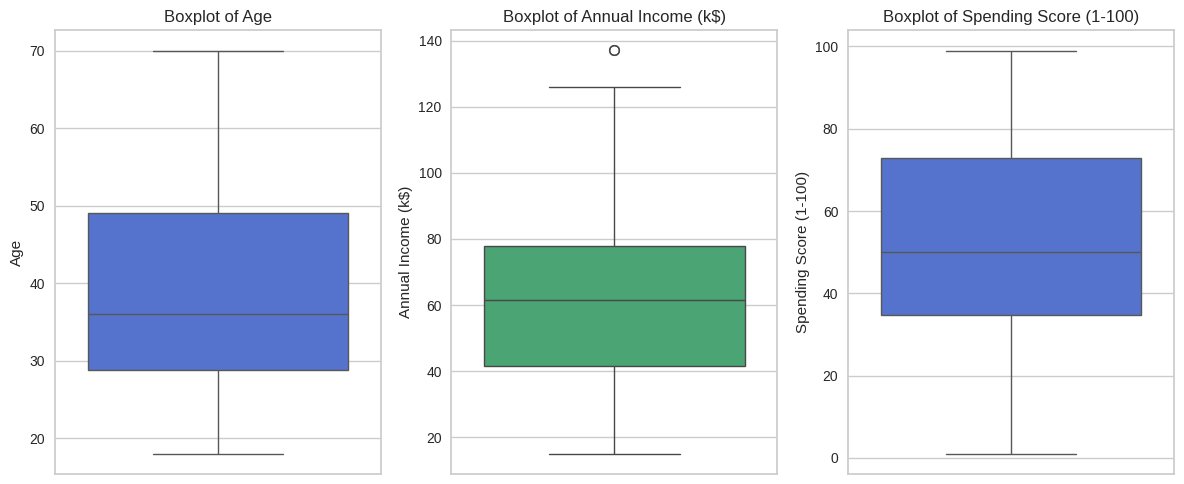

In [45]:
fig,ax = plt.subplots(1,3, figsize = (12,5))
color_sequence = ['royalblue', 'mediumseagreen', 'royalblue']
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i, col in enumerate(cols):
    sns.boxplot(y = df[col],ax= ax[i], color= color_sequence[i])
    ax[i].set_title("Boxplot of {}".format(col))

plt.tight_layout()
plt.show()

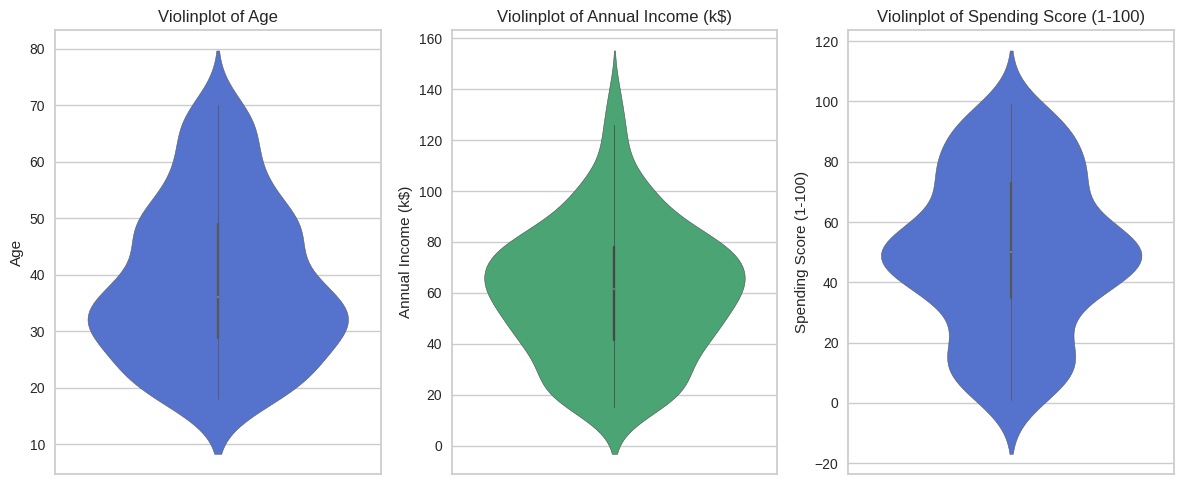

In [46]:
fig,ax = plt.subplots(1,3, figsize = (12,5))
color_sequence = ['royalblue', 'mediumseagreen', 'royalblue']
cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
for i, col in enumerate(cols):
    sns.violinplot(y = df[col],ax= ax[i], color= color_sequence[i])
    ax[i].set_title("Violinplot of {}".format(col))

plt.tight_layout()
plt.show()

**Age:**
+ The distribution is skewed right, meaning there are more young customers than older customers.
+ The majority of customers are between the ages of 30 and 40.
+ There are some exceptions in the older age group.

**Annual Income:**
+ The distribution is roughly normal, with a slight peak around 60k. Most clients have annual incomes of 40k.
+  Most clients have annual incomes of 40k to 90k
+ There are some outliers in the higher income bracket, above 120k

**Spending Score:**
+ The distribution is almost uniform, with a slight peak around 50.
+ Customers are distributed fairly evenly across the spending score range from 1 to 100.
+ There are no significant outliers in this variable.


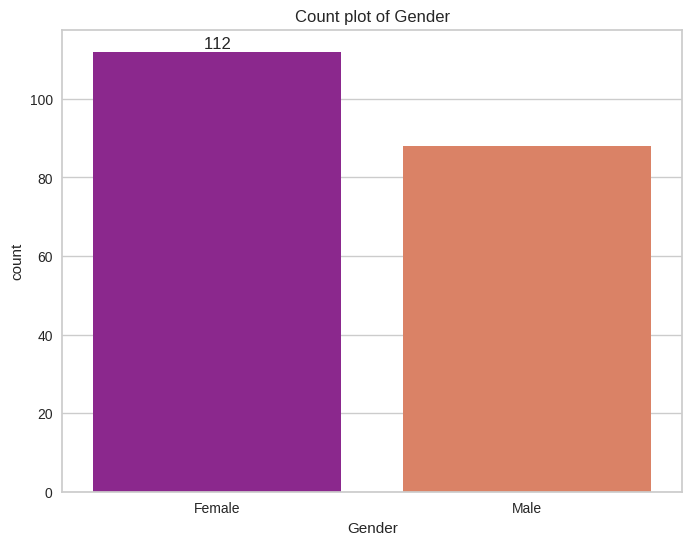

In [47]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= df["Gender"], palette = "plasma", order = df["Gender"].value_counts().index)
ax.bar_label(ax.containers[0])
ax.set_title("Count plot of Gender")
plt.show()

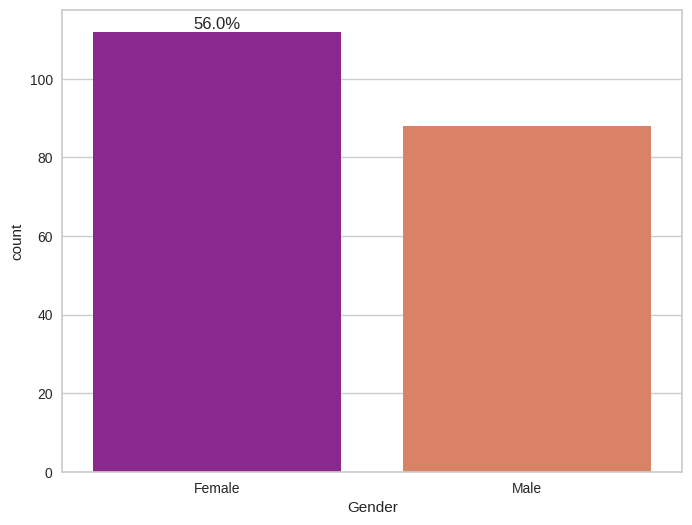

In [48]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x= df["Gender"], palette = "plasma", order = df["Gender"].value_counts().index)
total = df["Gender"].value_counts().sum()
percentages = [f"{v/total:.1%}" if v > 0 else "" for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=percentages)
plt.show()

There are more female customers than male customers in the dataset, with a ratio of about 56% female and 44% male.

In [49]:
df_not_ID = df.loc[:,~(df.columns.isin(["CustomerID"]))]
df_not_ID

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [50]:
df_not_ID['Gender'] = df_not_ID['Gender'].map({'Male': 0, 'Female': 1})
df_not_ID.loc[:,~(df_not_ID.columns.isin(["CustomerID"]))].corr()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [51]:
from scipy.stats import pearsonr

#### Age vs Annual Income in each sex groups

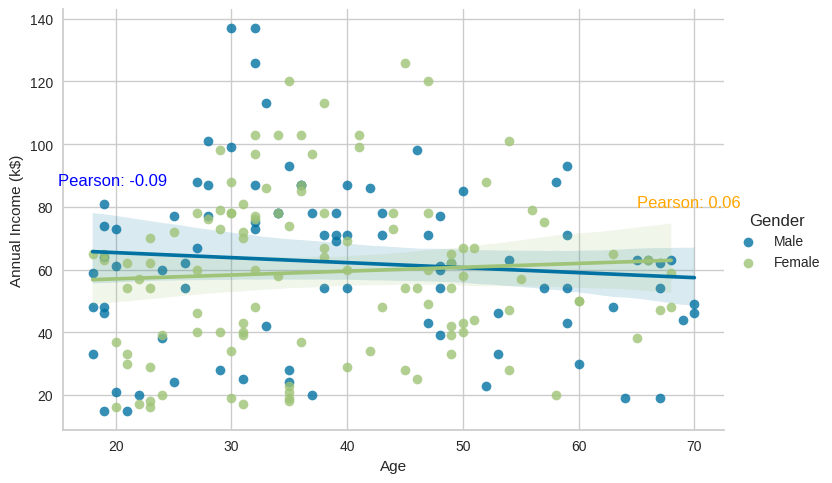

In [52]:
# calculating Pearson's correlations
corr1, _ = pearsonr(df["Age"].loc[df["Gender"]=="Male"].values, df["Annual Income (k$)"].loc[df["Gender"]=="Male"].values)
corr2, _ = pearsonr(df["Age"].loc[df["Gender"]=="Female"].values, df["Annual Income (k$)"].loc[df["Gender"]=="Female"].values)

sns.lmplot(x='Age',y= 'Annual Income (k$)', data=df, hue='Gender', aspect=1.5)

plt.text(15,87, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(65,80, 'Pearson: {:.2f}'.format(corr2), color='orange')

plt.show()

There is a negligible correlation between age and annual income of customers for both sex groups.

#### Age vs Spending Score in each sex groups

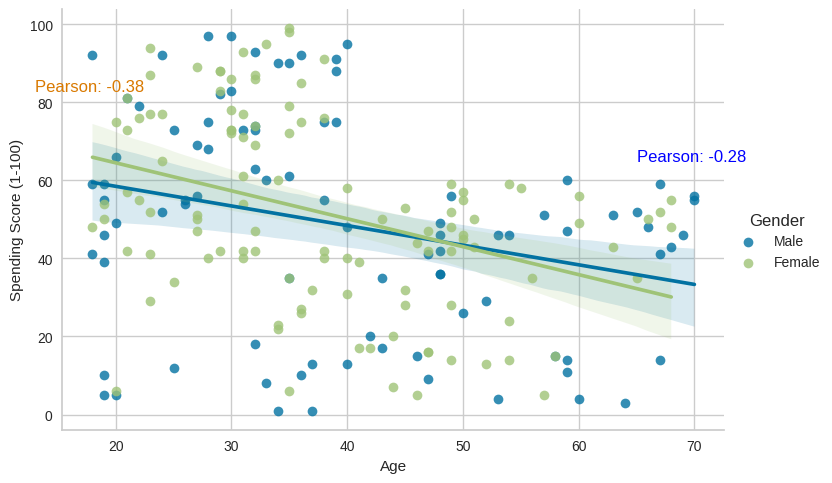

In [53]:
# calculating Pearson's correlations
corr1, _ = pearsonr(df["Age"].loc[df["Gender"]=="Male"].values,
                    df["Spending Score (1-100)"].loc[df["Gender"]=="Male"].values)

corr2, _ = pearsonr(df["Age"].loc[df["Gender"]=="Female"].values,
                    df["Spending Score (1-100)"].loc[df["Gender"]=="Female"].values)

sns.lmplot(x='Age',y= 'Spending Score (1-100)', data=df, hue='Gender',
          aspect=1.5)

plt.text(65,65, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(13,83, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There are week negative correlations (<0.5) between age and spending score for both sex groups.

#### Annual Income vs Spending Score in each sex groups

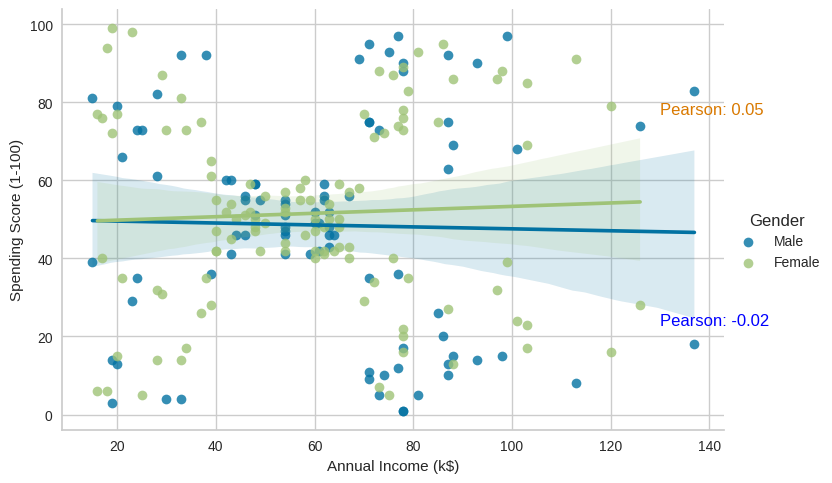

In [54]:
# calculating Pearson's correlations
corr1, _ = pearsonr(df["Annual Income (k$)"].loc[df["Gender"]=="Male"].values,
                    df["Spending Score (1-100)"].loc[df["Gender"]=="Male"].values)
corr2, _ = pearsonr(df["Annual Income (k$)"].loc[df["Gender"]=="Female"].values,
                    df["Spending Score (1-100)"].loc[df["Gender"]=="Female"].values)

sns.lmplot(x='Annual Income (k$)', y= 'Spending Score (1-100)', data=df, hue='Gender',
          aspect=1.5)

plt.text(130,23, 'Pearson: {:.2f}'.format(corr1), color='blue')
plt.text(130,77, 'Pearson: {:.2f}'.format(corr2), color='#d97900')

plt.show()

There are week negative correlations (<0.5) between age and spending score for both sex groups.

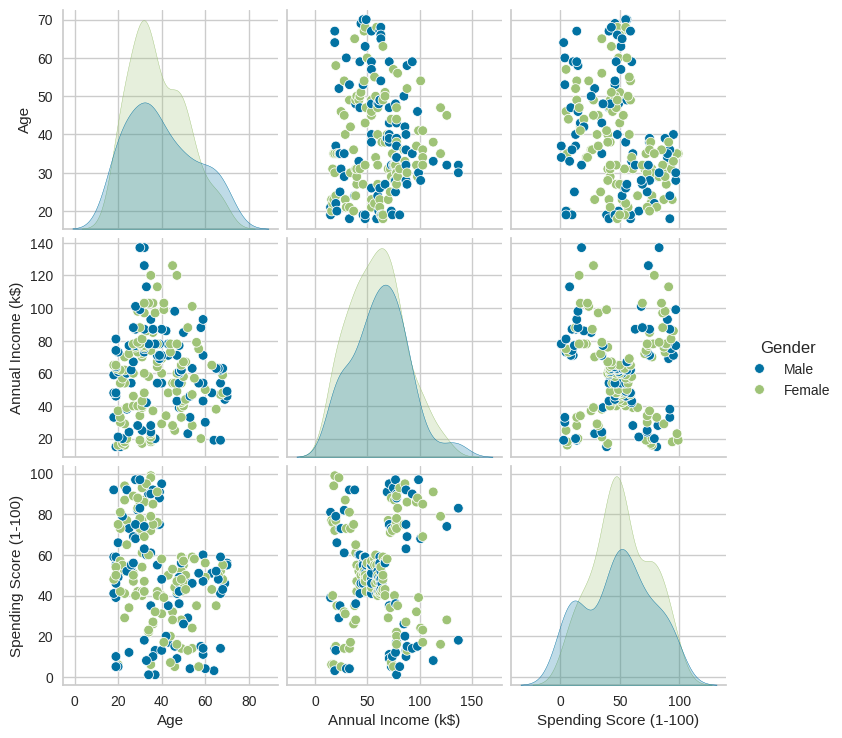

In [55]:
sns.pairplot(data=df.loc[:,~(df.columns.isin(["CustomerID"]))], hue= "Gender");

# 4.K-Means

In [56]:
X_numerics = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [57]:
from sklearn.cluster import KMeans

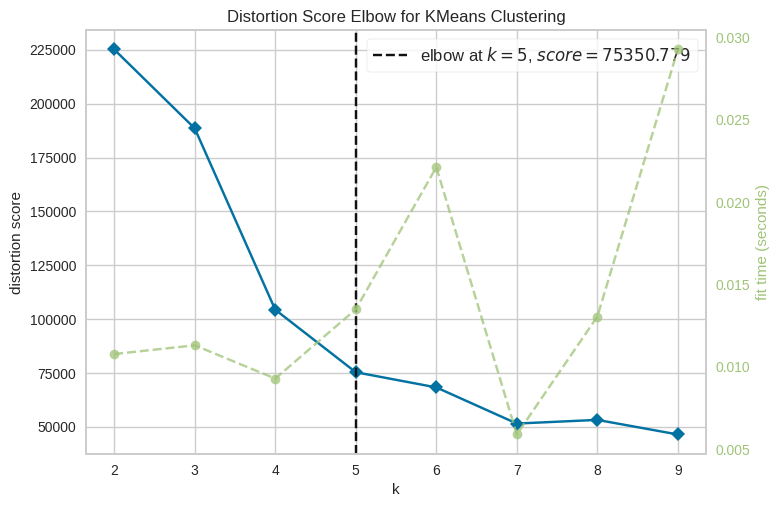

In [58]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X_numerics)
visualizer.show()
plt.show()

##### Build model with k = 5

In [59]:
KM_5_clusters = KMeans(n_clusters=5, init='k-means++').fit(X_numerics)

KM5_clustered = X_numerics.copy()
KM5_clustered.loc[:,'Cluster'] = KM_5_clusters.labels_

In [60]:
KM_5_clusters.cluster_centers_

array([[41.64705882, 88.73529412, 16.76470588],
       [33.39622642, 58.05660377, 48.77358491],
       [54.06      , 40.46      , 36.72      ],
       [32.69230769, 86.53846154, 82.12820513],
       [25.25      , 25.83333333, 76.91666667]])


Distortion score method indicates the best options would be 5 or 6 clusters.

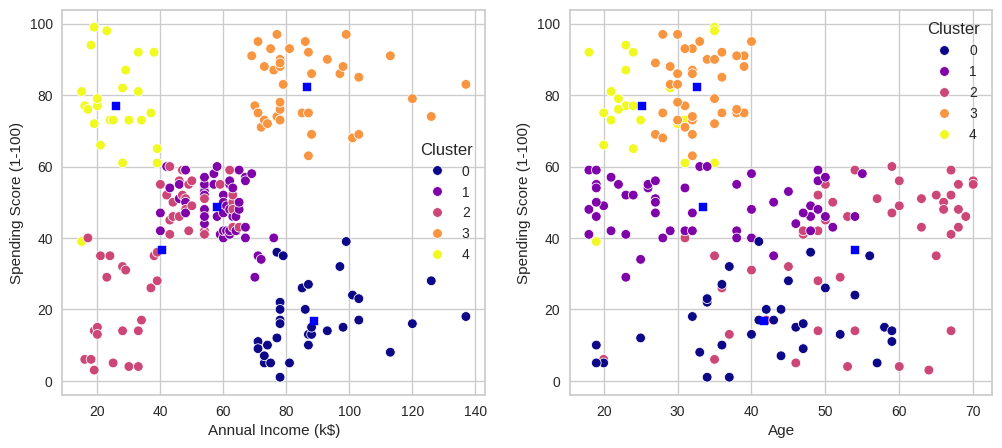

In [61]:
fig1, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', ax=axes[0], palette='plasma', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM5_clustered,
                hue='Cluster', palette='plasma', ax=axes[1], legend='full')

axes[0].scatter(KM_5_clusters.cluster_centers_[:,1],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_5_clusters.cluster_centers_[:,0],KM_5_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 5 clusters:

+ Clients with low annual income and high spending score
+ Clients with medium annual income and medium spending score
+ Clients with high annual income and low spending score
+ Clients with high annual income and high spending score
+ Clients with low annual income and low spending score

There are no distinct groups is terms of customers age.

###  Sizes of the clusters:

In [62]:
KM_clust_sizes = KM5_clustered.groupby('Cluster').size().to_frame()
KM_clust_sizes.columns = ["KM_size"]
KM_clust_sizes

,KM_size
Cluster,
0,34
1,53
2,50
3,39
4,24


The biggest cluster is a cluster number 4 with 76 observations ("medium-medium" clients). There are two the smallest ones each containing 23 observations (cluster 3 "low-low" and cluster 0 "low-high" clients)

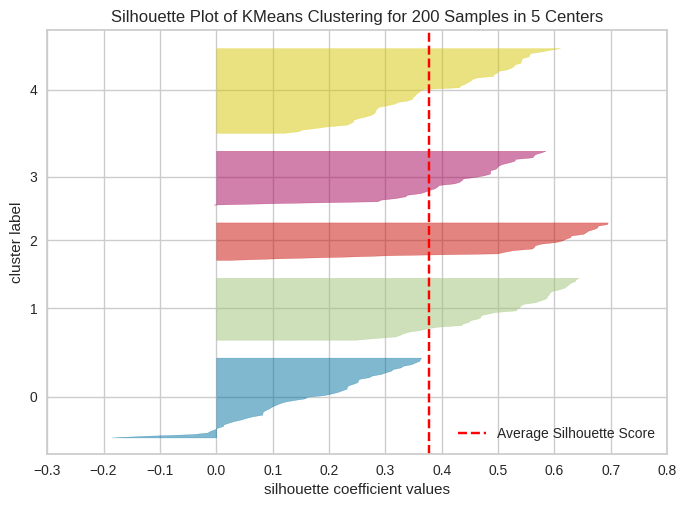

In [63]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=5, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

### Another k = 6

In [64]:
KM_6_clusters = KMeans(n_clusters=6, init='k-means++').fit(X_numerics)

KM6_clustered = X_numerics.copy()
KM6_clustered.loc[:,'Cluster'] = KM_6_clusters.labels_

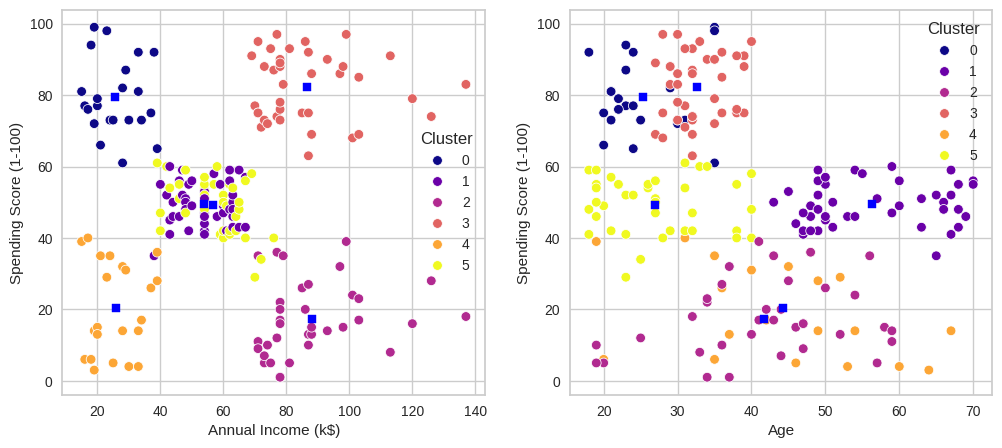

In [65]:
fig11, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', ax=axes[0], palette='plasma', legend='full')

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=KM6_clustered,
                hue='Cluster', palette='plasma', ax=axes[1], legend='full')

# plotting centroids
axes[0].scatter(KM_6_clusters.cluster_centers_[:,1], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
axes[1].scatter(KM_6_clusters.cluster_centers_[:,0], KM_6_clusters.cluster_centers_[:,2], marker='s', s=40, c="blue")
plt.show()

K-Means algorithm generated the following 6 clusters:

+ Younger clients with medium annual and medium spending score
+ Clients with high annual income and low spending score
+ Younger clients with medium annual and medium spending score
+ Clients with high annual income and high spending score
+ Clients with low annual income and low spending score
+ Clients with low annual income and high spending score

In [66]:
KM6_clust_sizes = KM6_clustered.groupby('Cluster').size().to_frame()
KM6_clust_sizes.columns = ["KM_size"]
KM6_clust_sizes

,KM_size
Cluster,
0,22
1,44
2,35
3,39
4,22
5,38


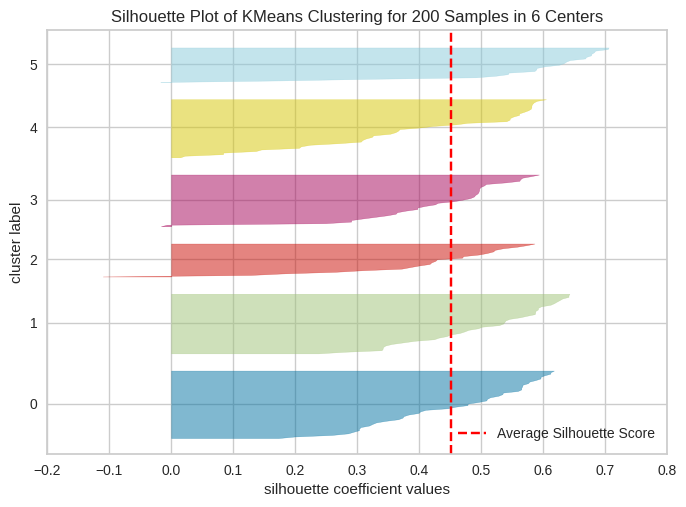

In [67]:
model = KMeans(n_clusters=6, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_numerics)
visualizer.show()
plt.show()

# DBSCAN


In [68]:
from itertools import product

eps_values = np.arange(7,12.75,0.25)
min_samples = np.arange(3,10)

DBSCAN_params = list(product(eps_values, min_samples))

In [69]:
DBSCAN_params

[(7.0, 3),
 (7.0, 4),
 (7.0, 5),
 (7.0, 6),
 (7.0, 7),
 (7.0, 8),
 (7.0, 9),
 (7.25, 3),
 (7.25, 4),
 (7.25, 5),
 (7.25, 6),
 (7.25, 7),
 (7.25, 8),
 (7.25, 9),
 (7.5, 3),
 (7.5, 4),
 (7.5, 5),
 (7.5, 6),
 (7.5, 7),
 (7.5, 8),
 (7.5, 9),
 (7.75, 3),
 (7.75, 4),
 (7.75, 5),
 (7.75, 6),
 (7.75, 7),
 (7.75, 8),
 (7.75, 9),
 (8.0, 3),
 (8.0, 4),
 (8.0, 5),
 (8.0, 6),
 (8.0, 7),
 (8.0, 8),
 (8.0, 9),
 (8.25, 3),
 (8.25, 4),
 (8.25, 5),
 (8.25, 6),
 (8.25, 7),
 (8.25, 8),
 (8.25, 9),
 (8.5, 3),
 (8.5, 4),
 (8.5, 5),
 (8.5, 6),
 (8.5, 7),
 (8.5, 8),
 (8.5, 9),
 (8.75, 3),
 (8.75, 4),
 (8.75, 5),
 (8.75, 6),
 (8.75, 7),
 (8.75, 8),
 (8.75, 9),
 (9.0, 3),
 (9.0, 4),
 (9.0, 5),
 (9.0, 6),
 (9.0, 7),
 (9.0, 8),
 (9.0, 9),
 (9.25, 3),
 (9.25, 4),
 (9.25, 5),
 (9.25, 6),
 (9.25, 7),
 (9.25, 8),
 (9.25, 9),
 (9.5, 3),
 (9.5, 4),
 (9.5, 5),
 (9.5, 6),
 (9.5, 7),
 (9.5, 8),
 (9.5, 9),
 (9.75, 3),
 (9.75, 4),
 (9.75, 5),
 (9.75, 6),
 (9.75, 7),
 (9.75, 8),
 (9.75, 9),
 (10.0, 3),
 (10.0, 4),
 (10.0, 5)

In [70]:
eps_values

array([ 7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,
        9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  , 11.25,
       11.5 , 11.75, 12.  , 12.25, 12.5 ])

In [71]:
eps_values.shape

(23,)

In [72]:
min_samples

array([3, 4, 5, 6, 7, 8, 9])

In [73]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

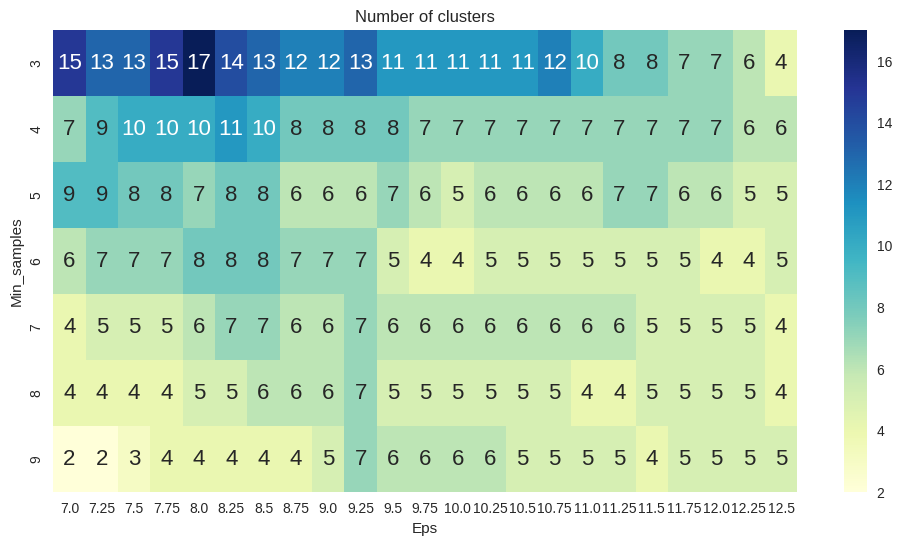

In [75]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [76]:
tmp

,Eps,Min_samples,No_of_clusters
0,7.0,3,15
1,7.0,4,7
2,7.0,5,9
3,7.0,6,6
4,7.0,7,4
...,...,...,...
156,12.5,5,5
157,12.5,6,5
158,12.5,7,4
159,12.5,8,4


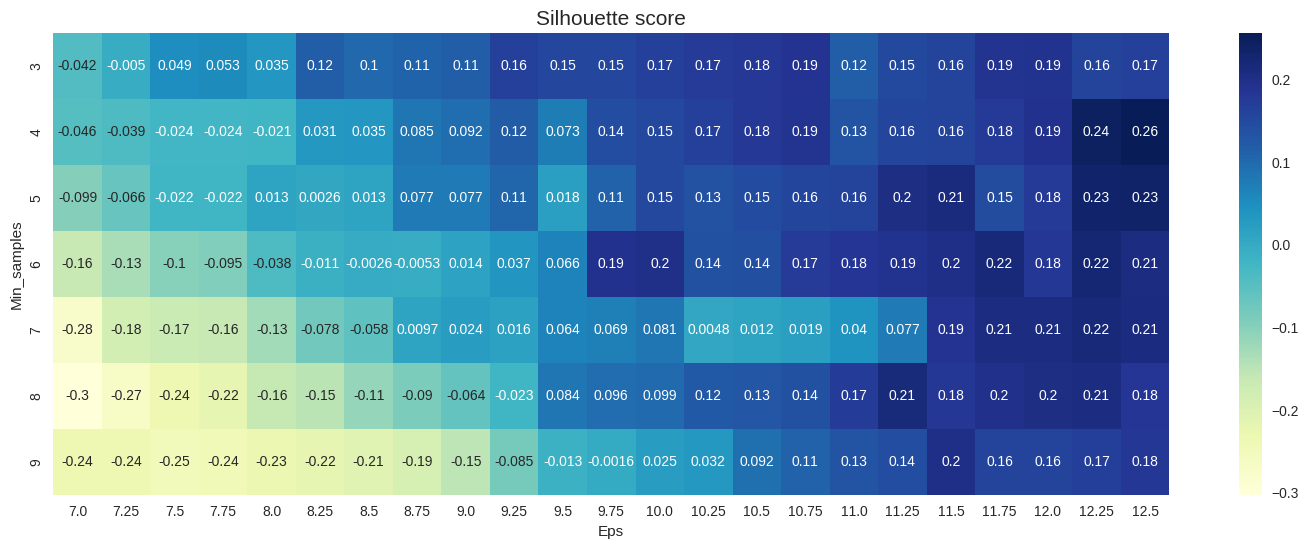

In [77]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)

plt.title("Silhouette score", fontsize = 15)
plt.show()

Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [78]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

In [79]:
DBSCAN_clustered = X_numerics.copy()

In [80]:
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_

In [81]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.

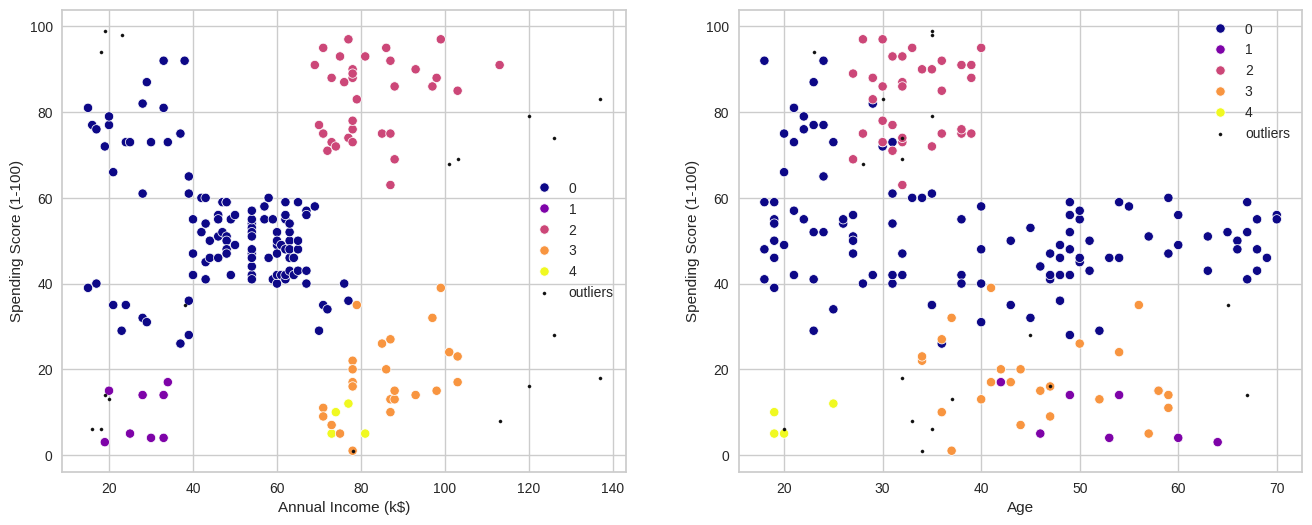

In [82]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(16,6))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', ax=axes[0], palette='plasma', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                data=DBSCAN_clustered[DBSCAN_clustered['Cluster']!=-1],
                hue='Cluster', palette='plasma', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()


plt.show()

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.